# Exam, Part 2, Fake Results

A dynamic study of CAPM and "betting against beta." The main task involves building a trading strategy that bets against CAPM. It is not sure that it will be a success.

In [1]:
using Printf, Dates, Statistics, DelimitedFiles   #you shouldn't need any other packages

include("jlFiles/printmat.jl");

In [2]:
using Plots

gr(size=(480,320))
default(fmt = :svg)

# Load Data

a. Import `Data/100_Portfolios_10x10.CSV` and convert all `-99.99` to `NaN`. Extract columns `2:end` and call that matrix `R`.

b. Import `Data/FFmFactors.csv` and extract `Rf` and `Rme` (columns 5 and 2).

c. Calculate excess returns as `Re = R .- Rf`

d. There are a few missing values in `Re`. For simplicity, convert them to 0.

In [3]:
File1 = "Data/100_Portfolios_10x10.CSV"
x   = readdlm(File1,',',skipstart=1)          #reading the csv file
ym  = round.(Int,x[:,1])                      #yearmonth, like 200712
dN  = Date.(string.(ym),"yyyymm")             #convert to Julia Date
R   = convert.(Float64,x[:,2:end])
replace!(R,-99.99=>NaN)                       #missing=>NaN

File2 = "Data/FFmFactors.csv"
x   = readdlm(File2,',',skipstart=1)          #reading the csv file
Rf  = x[:,5]
Rme = x[:,2]

Re  = R .- Rf
replace!(x->isunordered(x) ? 0 : x,Re)        #set missing Re to 0: as if no investment
(T,n) = size(Re)

for t = 1:T
  local vv
  vv = rand(1:n,n)
  Re[t,:] = Re[t,vv]
end

# Task 1: CAPM Regressions over Moving Data Windows

Let `x = [Rme ones(T)]`. Estimate the regression `Re[t-59:t,i]` on `x[t-59:t]` and record the slope cofefficient (that is, the coefficient on `Rme`) results in a matrix (`b[t,i]`).

Plot `b[:,11]` and `b[:,89]` in a time series plot, that is, for asset 11 and 89.

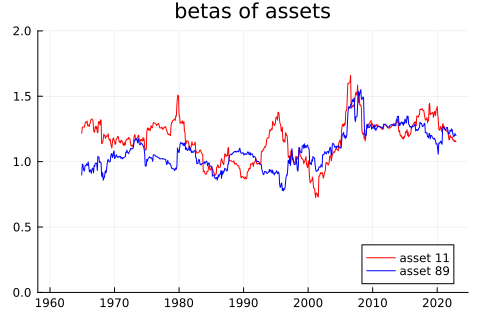

# Task 2: Rank Assets According to the Betas

a. For each period `t`, rank the assets according to the beta estimated over `t-59:t`, that is, rank `b[t,:]`. Clearly, this calculation can be done for `t=60:T`.
 
b. Plot the rank of assets 11 and 89 in a time series plot. Restrict the vertical axis to (0,100).

Hint: the function `rankPs()` might be useful

In [6]:
"""
    rankPs(x)

Calculates the ordinal rank of eack element in a vector `x`. As an aternative, use `ordinalrank` from the `StatsBase.jl` package
"""
rankPs(x) = invperm(sortperm(x))

println("Example of how rankPs() works")
x = [9,7,8]
printmat(x,rankPs(x);colNames=["data","rank"])

Example of how rankPs() works


      data      rank
     9         3    
     7         1    
     8         2    



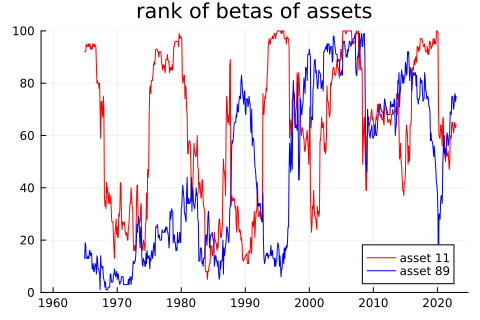

# Task 3: Create Portfolios and Calculate Portfolio Returns

a. For each period `t` (in `61:T`), create a portfolio which weights `1/10` for each of the assets with the 10 lowest ranks in `t-1` according to the point above (that is, those with the lowest betas). All other assets have zero weights. Save the weights as `wL[t,:]` in a matrix. Create the return in `t` and call the return series `RL`.

b. Do the same but for the assets with the 10 highest ranks and call the weights `wH` and the return series `RH`.

c. Plot `wL` for assets 11 and 89. Then plot `wH` for the same assets. Restrict the vertical axis to (0,1/10).

d. Calculate the frequency (over `t=61:T`) of asset 1 having a positive weight in `WL`. Do the same for `wH`. Print as 10x10 matrices in such a way that the first 10 assets are in row 1, the next 10 assets in row 2, etc.

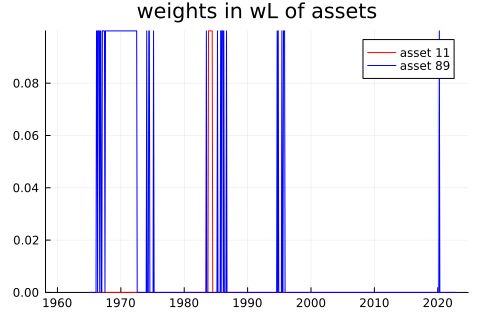

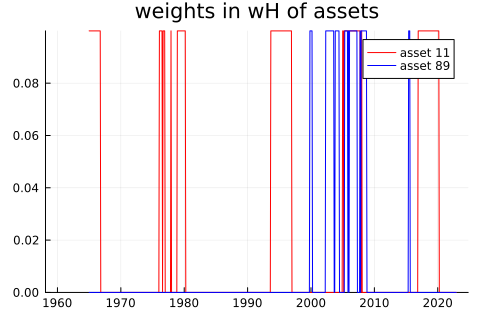

Relative frequency of wL>0


         1       2       3       4       5       6       7       8       9      10
1     0.11    0.06    0.11    0.14    0.02    0.06    0.12    0.10    0.18    0.10
2     0.01    0.12    0.12    0.09    0.04    0.27    0.06    0.09    0.25    0.39
3     0.04    0.13    0.22    0.16    0.09    0.14    0.02    0.07    0.14    0.10
4     0.05    0.04    0.02    0.09    0.07    0.09    0.06    0.09    0.00    0.02
5     0.00    0.13    0.06    0.05    0.07    0.06    0.13    0.10    0.15    0.11
6     0.01    0.23    0.16    0.11    0.14    0.14    0.15    0.00    0.16    0.08
7     0.05    0.07    0.22    0.04    0.31    0.00    0.17    0.14    0.07    0.06
8     0.22    0.06    0.11    0.05    0.06    0.06    0.07    0.08    0.00    0.02
9     0.02    0.03    0.03    0.03    0.14    0.07    0.12    0.15    0.13    0.20
10    0.00    0.14    0.01    0.18    0.22    0.12    0.21    0.11    0.06    0.02

Relative frequency of wH>0
         1       2       3       4       5       6       7 

# Task 4: Show Basic Return Statistics

a. For each `t`, calculate the average return across the 100 assets.

b. For `t=61:T`, calculate the the mean, std and Sharpe ratio of `RL`, `RH`, `Rme` and the average return from point a. Also, calculate the intercepts and the slope coefficients (for each of the 4 return series) on a regression on `[1 Rme]`.

c. Annualise the mean by 12, the std by sqrt(12) and the intercept by 12. Calculate the SR on the annalused values. Don't anualise the slope coefficients. Show results in a table.

                  RL        RH       Rme       avg
avg return     8.680     8.901     6.450     8.973
std           18.844    18.970    15.756    18.397
SR             0.461     0.469     0.409     0.488
α              1.625     1.754     0.000     1.920
β              1.094     1.108     1.000     1.093

